Импортируем библиотеки, которые будем использовать для равзедочного анализа

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl

Загружаем датасет abalone.csv с данными о молюсках с помощью библиотеки pandas

In [ ]:
DATASET = 'https://raw.githubusercontent.com/aiedu-courses/eda_and_dev_tools/refs/heads/main/datasets/abalone.csv'
df = pd.read_csv(DATASET)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7




``` Sex``` - Пол моллюска




```Length (Длина)``` - длина раковины в мм

```Diameter (Диаметр)``` - диаметр раковины в мм

```Height (Высота)``` - высота раковины в мм

```Whole weight (Общий вес)``` - полный вес в граммах

```Shucked weight (Вес мяса)``` - вес мяса без раковины

```Viscera weight (Вес внутренностей)``` - вес внутренних органов

```Shell weight (Вес раковины)``` - вес высушенной раковины

```Rings (Количество колец)``` - целое число, используется для определения возраста

Возраст моллюска = Rings + 1.5 года







Размер датасета и информация

In [ ]:
df.shape

(4177, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4078 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4078 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4127 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Проверим у категориальных признаков уникальные значения

In [ ]:
df['Sex'].unique()

array(['M', 'F', 'I', 'f'], dtype=object)

Заметим, что есть ```F``` и ```f```, это ошибка в данных, поэтому заменим f на F

In [ ]:
df['Sex'] = df['Sex'].replace('f', 'F')

df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

Количество пропущенных значений

In [ ]:
df.isnull().sum()

,0
Sex,0
Length,0
Diameter,99
Height,0
Whole weight,99
Shucked weight,0
Viscera weight,0
Shell weight,50
Rings,0


Заметим, что пропущенные значения есть в ```Diameter, Whole weight, Shell weight```

In [ ]:
df.duplicated().sum()

np.int64(0)

Дубликатов нет

Расмотрим распределние данных в виде гисторамм

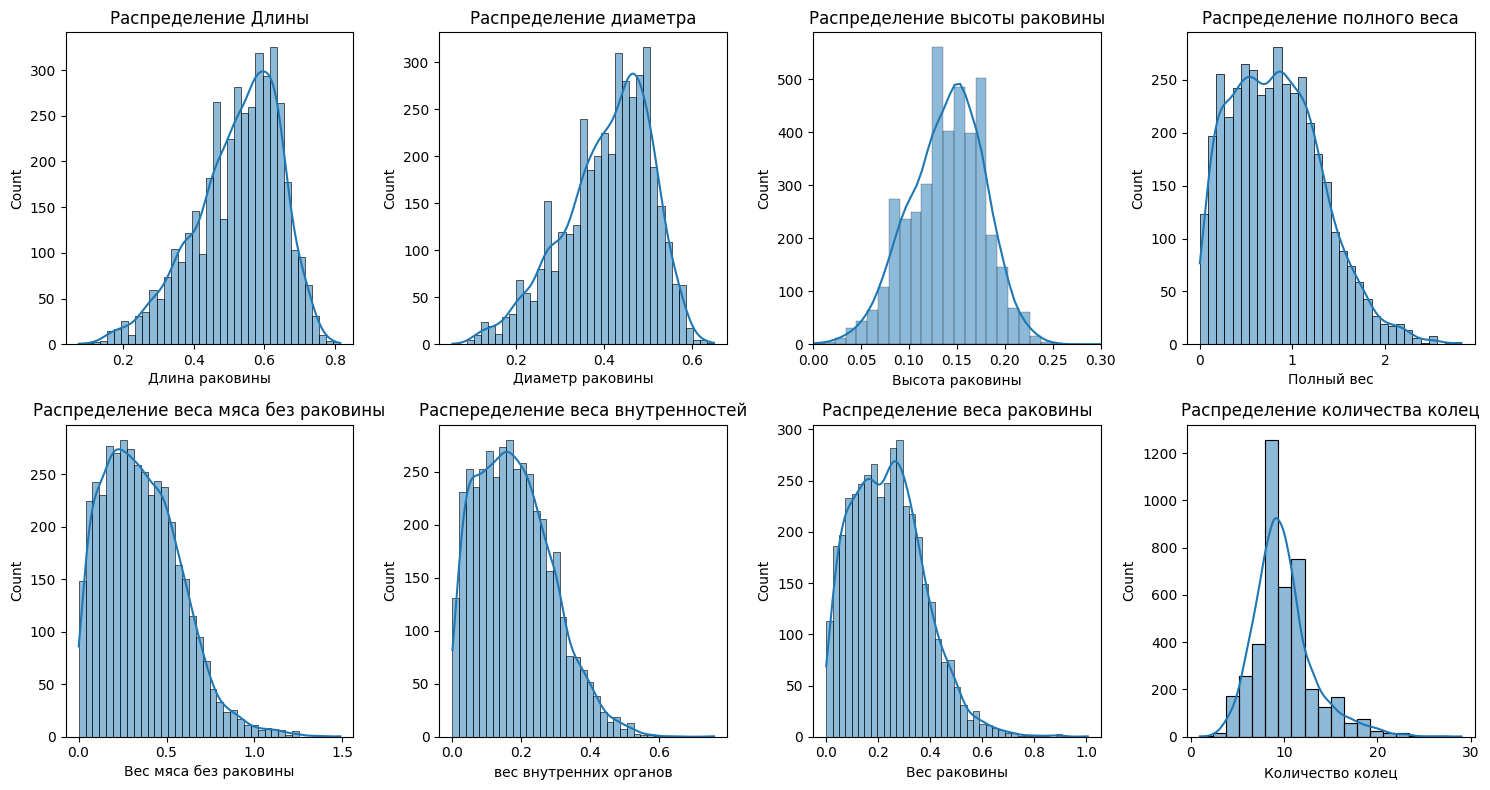

In [ ]:
plt.figure(figsize = (15, 8))

plt.subplot(2,4,1)
sns.histplot(df.Length, kde = True)
plt.xlabel('Длина раковины', labelpad=3)
plt.title('Распределение Длины')

plt.subplot(2,4,2)
sns.histplot(df.Diameter, kde = True)
plt.xlabel('Диаметр раковины', labelpad = 3)
plt.title('Распределение диаметра')

plt.subplot(2,4,3)
sns.histplot(df.Height, bins = 100, kde = True)
plt.xlim((0.0, 0.3))
plt.xlabel('Высота раковины')
plt.title('Распределение высоты раковины')

plt.subplot(2,4,4)
sns.histplot(df['Whole weight'], kde = True)
plt.xlabel('Полный вес')
plt.title('Распределение полного веса')

plt.subplot(2,4,5)
sns.histplot(df['Shucked weight'], kde = True)
plt.xlabel('Вес мяса без раковины', labelpad = 3)
plt.title('Распределение веса мяса без раковины')

plt.subplot(2,4,6)
sns.histplot(df['Viscera weight'], kde = True)
plt.xlabel('вес внутренних органов')
plt.title('Распеределение веса внутренностей')

plt.subplot(2,4,7)
sns.histplot(df['Shell weight'], kde = True)
plt.xlabel('Вес раковины')
plt.title('Распределение веса раковины')

plt.subplot(2,4,8)
sns.histplot(df.Rings, bins = 20,kde = True)
plt.xlabel('Количество колец')
plt.title('Распределение количества колец')


plt.tight_layout()
plt.show()

**ВЫВОД:** по графикам видно, что столбцы ```Length, Diameter, Height, Rings``` имеют нормальное распределение, у остальных столбцов большее количество значений приобладает на малых значениях измеряемой величины

Заполним пропущенные значения в зависимости от процента пропусков в столбце

In [ ]:
df.isnull().mean() * 100

,0
Sex,0.000000
Length,0.000000
Diameter,2.370122
Height,0.000000
Whole weight,2.370122
Shucked weight,0.000000
Viscera weight,0.000000
Shell weight,1.197031
Rings,0.000000


Так как процентов пропусков меньше ~2.5%, заполним пропуски медиаными значениями столбцов

In [ ]:
df['Diameter'] = df['Diameter'].fillna(df.Diameter.median())
df['Whole weight'] = df['Whole weight'].fillna(df['Whole weight'].median())
df['Shell weight'] = df['Shell weight'].fillna(df['Shell weight'].median())

In [ ]:
df.isnull().sum()

,0
Sex,0
Length,0
Diameter,0
Height,0
Whole weight,0
Shucked weight,0
Viscera weight,0
Shell weight,0
Rings,0


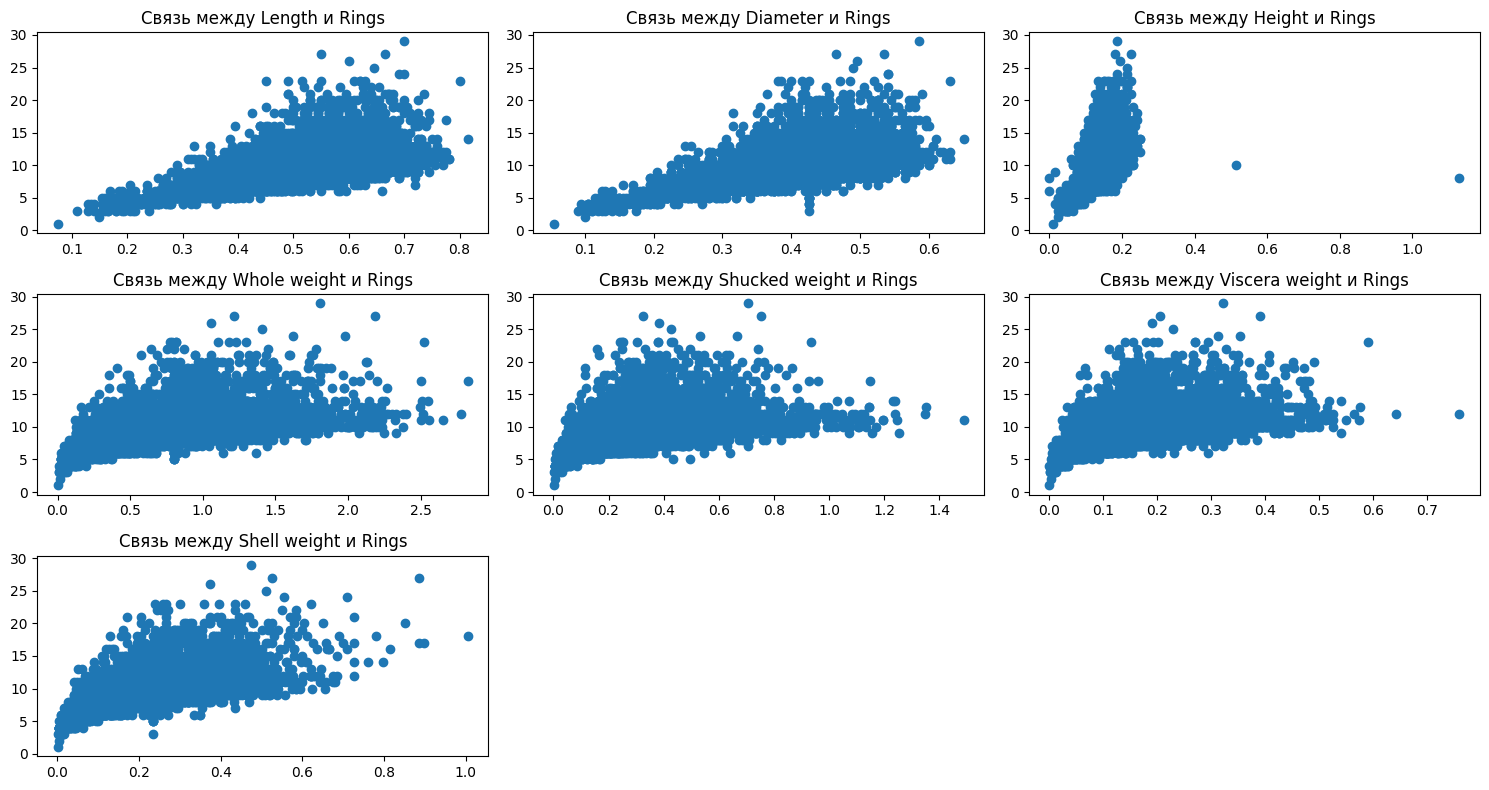

In [ ]:
col = [x for x in list(df.columns) if df[x].dtype != 'object' and x != 'Rings']

fig, axes = plt.subplots(3,3, figsize=(15, 8))

axes = axes.flatten()

for idx, name in enumerate(col):
  axes[idx].scatter(df[name], df.Rings)
  axes[idx].set_title(f"Связь между {name} и Rings")


axes_to_remove = []
for ax in fig.axes:
    if len(ax.lines) == 0 and len(ax.collections) == 0 and len(ax.patches) == 0:
        axes_to_remove.append(ax)


for ax in axes_to_remove:
    fig.delaxes(ax)


plt.tight_layout()
plt.show()

На основе графиков трудно сделать выводы о связи между выбранными переменными и целевой переменной, поэтому постоим матрицу корреляций

Рассмотрим матрицу корреляций по Пирсону

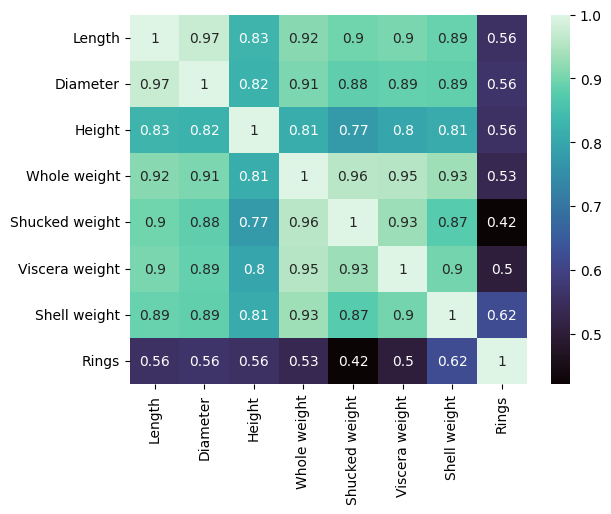

In [ ]:
corr = df.corr(numeric_only = True)
sns.heatmap(corr, cmap = 'mako', annot = True);

Видим, что все признаки имеют прямопропорциональную связь с целевой переменной. Самая большая связь с весом раковины моллюска

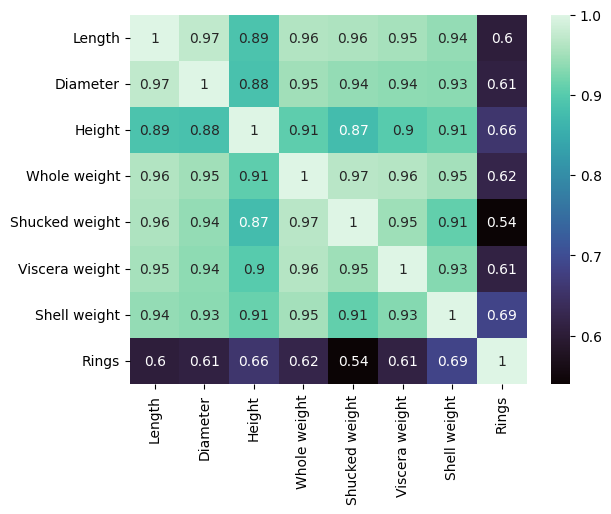

In [ ]:
corr = df.corr(numeric_only = True, method ='spearman')
sns.heatmap(corr, cmap = 'mako', annot = True);

Для подтверждения вывода, воспользуемся также матрицей корреляции по Спирмену, она дает почти такие же результаты

Расчитывать корреляцию для категориальных признаков можно по ANOVA

In [ ]:
from scipy.stats import f_oneway

Data = []

for c1 in df.columns:
  for c2 in df.columns:
    if df[c1].dtype == 'object' and df[c2].dtype != 'object':
      GROUPCategory = df.groupby(c1)[c2].apply(list)
      ANOVAres = f_oneway(*GROUPCategory)

      if ANOVAres[1] >= 0.05:
        Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
      else:
        Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

ANOVARES = pd.DataFrame(Data)
display(ANOVARES)

,Category,Numerical,Is correlated
0,Sex,Length,Yes
1,Sex,Diameter,Yes
2,Sex,Height,Yes
3,Sex,Whole weight,Yes
4,Sex,Shucked weight,Yes
5,Sex,Viscera weight,Yes
6,Sex,Shell weight,Yes
7,Sex,Rings,Yes


Как видим статистические различия между единственной категориальной группой ```Sex``` и целевой переменной ```Rings``` присутствует

Рассмотрим распределение целевой переменной и сделаем выводы, как это будет влиять на модель машинного обучения

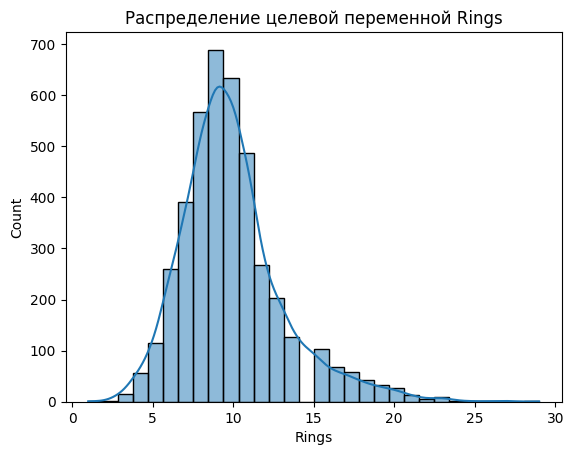

In [ ]:
sns.histplot(df.Rings, bins = 30,kde = True)
plt.title('Распределение целевой переменной Rings')
plt.show()

По графику видно, что распределение Rings - нормальное.

Так как распределение нормальное, ошибка после обучения нашей модели должна быть близка к минимальной

Создаем копию нашего датасета, только увеличиваем количество строк ~1000000

In [ ]:
df_big = df.copy()

for _ in range(260):
  df_big = pd.concat([df_big, df])

df_big.to_csv('abalone_big.csv', index = False)

In [ ]:
df_big.shape, df.shape

((1090197, 9), (4177, 9))

Получаем размер увеличенного датасета 1090197 строк, в сравнении в исходном датасете 4177 строк

Сравним производительность двух библиотек для анализа данных ```Polars``` и ```Pandas```. Будем сравнивать по времени:
1) чтению файла , 2) фильтрации данных, 3) агрегации данных

------------------------
1) Чтение файла

In [ ]:
# POLARS
%%time

df_pl = pl.read_csv('abalone_big.csv')

CPU times: user 806 ms, sys: 66.3 ms, total: 872 ms
Wall time: 493 ms


In [ ]:
# Pandas
%%time

df = pd.read_csv('abalone_big.csv')

CPU times: user 739 ms, sys: 65.9 ms, total: 805 ms
Wall time: 806 ms


Из результатов выполнения двух команд, видно то, что ```Polars``` немного быстрее, чем ```Pandas```, разница составляет не более 200-500 ms

--------------------------------------------------
2) Фильтрация данных

Найдем данные, где возраст (```Rings``` + 1.5 года) > среднего возраста и полный вес ```Whole weight``` > 1

In [ ]:
#Pandas
%%time

df[(df['Rings']+1.5 > np.mean(df['Rings'] + 1.5)) & (df['Whole weight'] > 1)]

CPU times: user 40.3 ms, sys: 0 ns, total: 40.3 ms
Wall time: 40.4 ms


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
24,F,0.615,0.480,0.165,1.1615,0.5130,0.3010,0.305,10
31,F,0.680,0.560,0.165,1.6390,0.6055,0.2805,0.460,15
32,F,0.665,0.525,0.165,1.3380,0.5515,0.3575,0.350,18
33,F,0.680,0.550,0.175,1.7980,0.8150,0.3925,0.455,19
34,F,0.705,0.550,0.200,1.7095,0.6330,0.4115,0.490,13
...,...,...,...,...,...,...,...,...,...
1090167,M,0.695,0.550,0.195,1.6645,0.7270,0.3600,0.445,11
1090168,M,0.770,0.605,0.175,2.0505,0.8005,0.5260,0.355,11
1090180,F,0.585,0.475,0.165,1.0530,0.4580,0.2170,0.300,11
1090195,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.296,10


In [ ]:
#POLARS
%%time

df_pl.filter(((pl.col('Rings') + 1.5 > pl.col('Rings').mean() + 1.5))& (pl.col('Whole weight') > 1))

CPU times: user 35.9 ms, sys: 15 ms, total: 50.9 ms
Wall time: 33.1 ms


Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
str,f64,f64,f64,f64,f64,f64,f64,i64
"""F""",0.615,0.48,0.165,1.1615,0.513,0.301,0.305,10
"""F""",0.68,0.56,0.165,1.639,0.6055,0.2805,0.46,15
"""F""",0.665,0.525,0.165,1.338,0.5515,0.3575,0.35,18
"""F""",0.68,0.55,0.175,1.798,0.815,0.3925,0.455,19
"""F""",0.705,0.55,0.2,1.7095,0.633,0.4115,0.49,13
…,…,…,…,…,…,…,…,…
"""M""",0.695,0.55,0.195,1.6645,0.727,0.36,0.445,11
"""M""",0.77,0.605,0.175,2.0505,0.8005,0.526,0.355,11
"""F""",0.585,0.475,0.165,1.053,0.458,0.217,0.3,11


Как видно фильтрация отличается на 5-10 ms, где-то ```Pandas``` быстрее, а где-то ```Polars```

-----------------------------------------------------------
3) Агрегация данных

Сгруппируем данные по полу ```Sex```,найдем среднее значение полного веса ```Whole weight```и максимальноезначение по количеству колец моллюска ```Rings```

In [ ]:
#Pandas
%%time

df.groupby('Sex').agg({'Whole weight':'mean', 'Rings':'max'})

CPU times: user 120 ms, sys: 0 ns, total: 120 ms
Wall time: 135 ms


,Whole weight,Rings
Sex,,
F,1.017649,29
I,0.438131,21
M,0.977255,27


Для группировки с помощью ```Polars``` сначала воспользуемся прямой группировкий, а потом используем метод Lazy

In [ ]:
# Polars
%%time

df_pl.group_by('Sex').agg([pl.mean('Whole weight'), pl.max('Rings')])

CPU times: user 59.4 ms, sys: 931 µs, total: 60.3 ms
Wall time: 32.4 ms


Sex,Whole weight,Rings
str,f64,i64
"""I""",0.438131,21
"""M""",0.977255,27
"""F""",1.017649,29


In [ ]:
# Polars - Lazy
%%time

q = (
    df_pl
    .lazy()
    .group_by(by = 'Sex')
    .agg([
        pl.col('Whole weight').mean()
        , pl.col('Rings').max()
    ])
)



CPU times: user 161 µs, sys: 0 ns, total: 161 µs
Wall time: 165 µs


In [ ]:
%%time

q.collect()

CPU times: user 56.3 ms, sys: 4.76 ms, total: 61.1 ms
Wall time: 47.6 ms


by,Whole weight,Rings
str,f64,i64
"""F""",1.017649,29
"""I""",0.438131,21
"""M""",0.977255,27


По результатам видно, что группировка у двух библиотек не сильно отличается по времени, но в библиотеки ```Polars``` есть полезный метод Lazy